<a href="https://colab.research.google.com/github/marcelo-guimaraes/Data-Science/blob/master/Codenation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Desafio para participar do programa AceleraDev - DataScience

Esse desafio foi proposto pela [Codenation](https://www.codenation.dev/) e nele precisamos criar um modelo de Regressão para prevermos a nota de um estudante na disciplina de matemática no Enem

In [0]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

from sklearn import metrics

In [0]:
df_train = pd.read_csv('/content/drive/My Drive/train.csv')
df_test = pd.read_csv('/content/drive/My Drive/test.csv')

## Exploratory Data Analisys

In [24]:
df_train

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,...,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,1,1,1,1,1,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,3,1,2304400.0,Fortaleza,23.0,CE,3,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,5,5,5,5,5,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,1,3304557.0,Rio de Janeiro,33.0,RJ,1,9,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,B,B,A,B,A,B,C,A,B,D,B,C,B,C,F,C,2.0,0.0,5.0,5.0,5.0,5,5,5,5,2,5,5,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,2,1,1505304.0,Oriximiná,15.0,PA,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,B,A,A,A,A,B,A,A,B,A,A,A,B,F,D,5.0,4.0,3.0,5.0,4.0,5,5,4,3,1,4,5,NaN,A,A,A,A,A,A,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,4582,aadf671ef8c1c6efa42e69432093ab83c17a52ac,2016,3502903,Araçoiaba da Serra,35,SP,20,M,0.0,1,1,3552205.0,Sorocaba,35.0,SP,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,B,A,B,A,A,C,B,B,E,B,B,B,B,C,A,5.0,5.0,5.0,5.0,5.0,5,5,5,5,5,5,5,NaN,A,A,A,A,A,A,A,A,A
13726,4583,461f7ef2753d9d5fa0b054930d6b0e0eec318e81,2016,2613800,São Vicente Ferrer,26,PE,33,F,0.0,3,2,NaN,NaN,NaN,NaN,1,10,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,B,B,A,B,B,I,A,4.0,4.0,5.0,5.0,4.0,5,5,5,5,5,5,5,NaN,A,A,B,B,A,A,A,A,A
13727,4584,5354503700ecf2388f68990435390b6e1ad454ee,2016,4322186,Tupanci do Sul,43,RS,15,F,0.0,1,1,4303202.0,Cacique Doble,43.0,RS,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,B,A,A,A,A,B,A,A,B,A,A,B,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,3,2,2,2,2,2,NaN,A,A,A,A,C,A,A,A,A
13728,4585,c7a9e94a42bd76b7978f13c013a61702e36cc42c,2016,3303203,Nilópolis,33,RJ,36,M,1.0,3,1,3304557.0,Rio de Janeiro,33.0,RJ,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,B,A,A,B,A,B,A,A,C,B,B,B,C,E,E,5.0,5.0,5.0,5.0,5.0,5,5,2,5,5,3,5,5.0,A,A,A,A,D,A,A,A,D


In [25]:
df_train.describe()

,Unnamed: 0,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,...,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,CO_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
count,13730.000000,13730.0,1.373000e+04,13730.000000,13730.000000,13202.000000,13730.000000,13730.000000,1.312100e+04,13121.000000,13730.000000,13730.000000,13730.000000,4282.000000,13730.000000,4.282000e+03,4.282000e+03,4282.000000,4282.000000,4282.000000,4282.000000,13730.000000,13730.0,13730.000000,13730.000000,13730.0,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.0,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.0,13730.000000,...,13730.0,13730.000000,13730.0,13730.0,13730.0,13730.000000,13730.000000,1638.000000,1.373000e+04,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,10341.000000,10341.000000,10133.000000,10133.000000,13730.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,13730.000000,6355.000000,6355.000000,6354.000000,6354.000000,6354.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,2938.000000
mean,2288.173926,2016.0,3.088548e+06,30.736708,21.593809,0.116043,2.185652,1.048871,3.057946e+06,30.429159,1.782666,2.146176,1.353532,1.178888,0.129862,3.121720e+07,3.123638e+06,31.085474,2.259692,1.030827,1.001635,0.001238,0.0,0.000364,0.000510,0.0,0.002185,0.000146,0.000947,0.000073,0.000073,0.0,0.000437,0.000510,0.009687,0.000947,0.001602,0.000146,0.0,0.004151,...,0.0,0.000073,0.0,0.0,0.0,0.000364,0.119301,30.639194,3.085637e+06,30.709250,0.754479,0.754479,0.738747,0.738747,473.495155,529.661087,516.472841,482.497928,0.593664,1.101747,119.811704,111.915918,106.824238,113.123951,77.372446,529.048258,4.083467,3.833360,2.608812,4.375984,4.530217,3.962858,4.645594,4.678441,3.341515,4.458995,3.724618,3.506409,4.442098,3.671545
std,1321.230607,0.0,9.890495e+05,9.862405,7.043654,0.365986,1.007285,0.258895,9.703020e+05,9.670030,0.880734,3.217328,0.558472,0.565490,0.336163,9.540289e+06,9.574114e+05,9.546193,0.698586,0.172868,0.040404,0.035167,0.0,0.019080,0.022575,0.0,0.046695,0.012069,0.030757,0.008534,0.008534,0.0,0.020901,0.022575,0.097947,0.030757,0.039998,0.012069,0.0,0.064301,...,0.0,0.008534,0.0,0.0,0.0,0.019080,0.324154,9.884543,9.888721e+05,9.860227,0.431932,0.431932,0.440162,0.440162,71.093674,73.726344,68.688190,99.826323,0.491167,0.700100,29.846017,33.737588,34.341349,33.480033,43.067140,154.294758,1.603004,1.661301,2.234009,1.210998,1.027613,1.625356,0.920998,0.865039,1.711930,1.200172,1.689362,1.718858,1.181549,1.746444
min,0.000000,2016.0,1.100023e+06,11.000000,13.000000,0.000000,0.000000,0.000000,1.100023e+06,11.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.100189e+07,1.100023e+06,11.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,11.000000,1.100023e+06,11.000000,0.000000,0.

In [26]:
df_train.columns

Index(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       ...
       'Q041', 'Q042', 'Q043', 'Q044', 'Q045', 'Q046', 'Q047', 'Q048', 'Q049',
       'Q050'],
      dtype='object', length=167)

In [27]:
df_train['NU_NOTA_MT']

0        399.4
1        459.8
2          NaN
3          NaN
4          NaN
         ...  
13725    403.2
13726    452.4
13727    398.0
13728    386.6
13729    428.9
Name: NU_NOTA_MT, Length: 13730, dtype: float64

## Selecionando as colunas de maior correlação com meu _Target_ para serem meus _Features_

In [28]:
a = df_train.corr()
features = a[a['NU_NOTA_MT'] > abs(0.2)].index
df_train = df_train[features]
df_train

,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,NaN,436.3,495.4,581.2,399.4,120.0,120.0,120.0,80.0,80.0,520.0
1,2.0,474.5,544.1,599.0,459.8,140.0,120.0,120.0,120.0,80.0,580.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
13725,NaN,438.2,419.7,394.5,403.2,120.0,120.0,80.0,80.0,40.0,440.0
13726,NaN,423.8,557.9,533.0,452.4,120.0,120.0,120.0,120.0,80.0,560.0
13727,NaN,460.5,528.9,569.3,398.0,120.0,120.0,120.0,120.0,120.0,600.0
13728,NaN,422.5,621.7,569.0,386.6,100.0,100.0,80.0,80.0,100.0,460.0


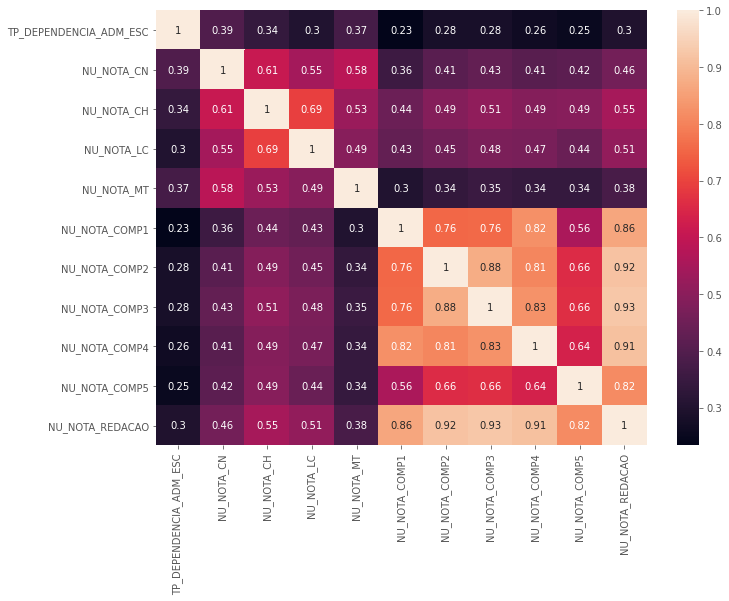

In [29]:
ax = plt.subplots(figsize=(11, 8))
sns.heatmap(df_train.corr(),  annot=True, annot_kws={"size": 10})


## [Lidando com _Missing Values_](https://medium.com/@marcelofelippe.mfg/lidando-com-missing-values-no-python-8f71115dcce5)

In [30]:
 print(df_train.shape)
 print()
 x = df_train.isnull().sum()
 x[x > 0]

(13730, 11)



TP_DEPENDENCIA_ADM_ESC    9448
NU_NOTA_CN                3389
NU_NOTA_CH                3389
NU_NOTA_LC                3597
NU_NOTA_MT                3597
NU_NOTA_COMP1             3597
NU_NOTA_COMP2             3597
NU_NOTA_COMP3             3597
NU_NOTA_COMP4             3597
NU_NOTA_COMP5             3597
NU_NOTA_REDACAO           3597
dtype: int64

Podemos observar que a coluna TP_DEPENDENCIA_ADM_ESC contém a maioria de seus dados faltantes, portanto irei excluí-la 

In [0]:
df_train = df_train.iloc[:,1:]

### Porém, mesmo com essa coluna sendo eliminada, ainda temos muitos _Missing Values_ para tratarmos

In [32]:
df_train.isnull().sum()

NU_NOTA_CN         3389
NU_NOTA_CH         3389
NU_NOTA_LC         3597
NU_NOTA_MT         3597
NU_NOTA_COMP1      3597
NU_NOTA_COMP2      3597
NU_NOTA_COMP3      3597
NU_NOTA_COMP4      3597
NU_NOTA_COMP5      3597
NU_NOTA_REDACAO    3597
dtype: int64

Carregando os dados de testes para fazer a seleção de features


In [33]:
df_test.shape

(4576, 47)

In [35]:
cols = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_COMP1','NU_NOTA_COMP2',
        'NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5', 'NU_NOTA_REDACAO']

df_test = df_test[cols]
'''df_test = df_test.replace(0,np.nan)
df_test = df_test.loc[(df_test['NU_NOTA_CN'].notnull()) & 
                      (df_test['NU_NOTA_CH'].notnull()) &
                      (df_test['NU_NOTA_LC'].notnull()) & 
                      (df_test['NU_NOTA_REDACAO'].notnull())]'''
print(df_test.shape)
df_test.head()                      

(4576, 9)


,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,464.8,443.5,431.8,120.0,80.0,80.0,100.0,40.0,420.0
1,391.1,491.1,548.0,120.0,120.0,120.0,120.0,100.0,580.0
2,595.9,622.7,613.6,80.0,40.0,40.0,80.0,80.0,320.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,592.9,492.6,571.4,100.0,80.0,60.0,80.0,0.0,320.0


In [36]:
df_test.isnull().sum()                       

NU_NOTA_CN         1134
NU_NOTA_CH         1134
NU_NOTA_LC         1199
NU_NOTA_COMP1      1199
NU_NOTA_COMP2      1199
NU_NOTA_COMP3      1199
NU_NOTA_COMP4      1199
NU_NOTA_COMP5      1199
NU_NOTA_REDACAO    1199
dtype: int64

#### Pronto, com os dados de testes já carregados, lidarei com os valores faltantes preenchendo-os com zero, uma vez que se eu excluir esses valores dos dados de treino, meu modelo não saberá lidar bem com eles nos dados de teste

In [0]:
df_train.fillna(0, inplace = True)
df_test.fillna(0,inplace = True)

In [0]:
y_train = df_train['NU_NOTA_MT']
x_train = df_train[cols]
x_test = df_test

In [0]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

XGBR = XGBRegressor(n_estimators = 800, learning_rate = 0.05, random_state = 0)

In [0]:
Forest = RandomForestRegressor( 
           criterion='mae', 
           max_depth=8,
           max_leaf_nodes=None,
           min_impurity_split=None,
           min_samples_leaf=1,
           min_samples_split=2,
           min_weight_fraction_leaf=0.0,
           n_estimators= 500,
           n_jobs=-1,
           random_state=0,
           verbose=0,
           warm_start=False
)

# Modelos

#### Primeiro irei dividir os dados para treino e validação

In [0]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(x_train,y_train, 
                                                       test_size = 0.3)

##### Aplicando o modelo [Extreme Gradient Boosting Regression](https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/)

In [43]:
XGBR.fit(X_treino, y_treino)
y_xgbr_test = XGBR.predict(X_teste)
y_xgbr_modelo = XGBR.predict(x_test)

print('MAE:', metrics.mean_absolute_error(y_teste, y_xgbr_test).round(8)  )
print('MSE:', metrics.mean_squared_error(y_teste, y_xgbr_test).round(8) )  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_teste, y_xgbr_test)).round(8))

[02:12:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 44.20379367
MSE: 4231.42947811
RMSE: 65.04943872


In [45]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
        max_depth=1, random_state=0, loss='ls').fit(X_treino, y_treino)

y_ens_modelo = est.predict(x_test)

print('MAE:', metrics.mean_absolute_error(y_teste, est.predict(X_teste)).round(8)  )
print('MSE:', metrics.mean_squared_error(y_teste, est.predict(X_teste)).round(8) )  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_teste, est.predict(X_teste))).round(8))

MAE: 44.30014989
MSE: 4103.14779566
RMSE: 64.05581781


#### Aplicando o [Random Forest Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [57]:
Forest.fit(X_treino, y_treino)
y_forest_test = Forest.predict(X_teste)
y_forest_modelo = Forest.predict(x_train)

print('MAE:', metrics.mean_absolute_error(y_teste, y_forest_test).round(8))
print('MSE:', metrics.mean_squared_error(y_teste, y_forest_test).round(8) )  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_teste, y_forest_test)).round(8))

MAE: 43.19496446
MSE: 4139.25808944
RMSE: 64.33706622


#### Por fim, aplicando uma [Rede Neural](https://www.tensorflow.org/)

In [56]:
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_treino = sc.fit_transform(X_treino)
X_teste = sc.transform(X_teste)


# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(15, activation = 'relu', input_dim = 9))

# Adding the second hidden layer
model.add(Dense(units = 15, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 15, activation = 'relu'))

# Adding the output layer

model.add(Dense(units = 1, kernel_initializer='normal',activation='linear'))

#model.add(Dense(1))
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

#model.summary()
# Fitting the ANN to the Training set
model.fit(X_treino, y_treino, epochs = 100, batch_size = 32)

y_pred = model.predict(X_teste)
y_neural_modelo = model.predict(x_test)

print('MAE:', metrics.mean_absolute_error(y_teste, y_pred).round(8)  )
print('MSE:', metrics.mean_squared_error(y_teste, y_pred).round(8) )  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred)).round(8))

Epoch 1/100
301/301 [==============================] - 0s 1ms/step - loss: 128215.6172
Epoch 2/100
301/301 [==============================] - 0s 1ms/step - loss: 13935.4434
Epoch 3/100
301/301 [==============================] - 0s 1ms/step - loss: 7602.9053
Epoch 4/100
301/301 [==============================] - 0s 1ms/step - loss: 6188.0581
Epoch 5/100
301/301 [==============================] - 0s 1ms/step - loss: 5410.6748
Epoch 6/100
301/301 [==============================] - 0s 1ms/step - loss: 5011.1021
Epoch 7/100
301/301 [==============================] - 0s 1ms/step - loss: 4786.5176
Epoch 8/100
301/301 [==============================] - 0s 1ms/step - loss: 4671.5796
Epoch 9/100
301/301 [==============================] - 0s 1ms/step - loss: 4620.2817
Epoch 10/100
301/301 [==============================] - 0s 1ms/step - loss: 4589.6558
Epoch 11/100
301/301 [==============================] - 0s 1ms/step - loss: 4570.4204
Epoch 12/100
301/301 [==============================] - 0s 1

# Conclusão

Baseado nos erros que foram retornados, podemos considerar o XGBRegressor ou o Gradient Boosting Regressor como os melhores modelos para esse programa, uma vez que são mais fáceis de implementar que uma Rede Neural e nesse caso demora 10 vezes menos para rodar do que o Random Forest Regressor